    
# <span style="color:#993063"> Propensity To Pay Model <a name="id3"></a>

### Author: Jacky Barraza

### Notebook 3.1/3.3
    
It’s time to build and train propensity models using different algorithmic approaches
    
This notebook contain the process regarding the first approach defining for the modeling process. 
    
The algorithms decided to test on this section are: 
    
    LogisticRegression
    DecisionTreeClassifier
    RandomForestClassifier
    SGDClassifier
    GaussianNB
    AdaBoostClassifier
    XGBClassifier
    

#  <span style="color:#E8846F"> Setting the tools <a name="id3"></a>

### Paths

In [1]:
import os
print("My current working directory is", os.getcwd())

My current working directory is /Users/jackyb/Projects/Lyon_Ds/CreditRiskPayment_JB/notebooks


In [2]:
config_input = '/Users/jackyb/Projects/Lyon_Ds/PropensityToPayModel/data/output/'

config_output = '/Users/jackyb/Projects/Lyon_Ds/PropensityToPayModel/data/output/'

### Libraries

In [3]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import loadtxt

import xgboost as xgb
import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, auc, roc_auc_score


### General Variables

In [4]:
#general
PERCENTILE = [.25, .50, .75]
INCLUDE = ['object', 'float', 'int']
NUMERICS = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


#palette colors
SETCOL = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
SETCOL1 = ["#6dccda", "#cdcc5d", "#a2a2a2", "#ed97ca", "#a8786e", "#ad8bc9", "#ed665d", "#67bf5c", "#ff9e4a", "#729ece"]
SETCOL2 = ["#ed665d", "#67bf5c", "#ff9e4a", "#729ece", "#ad8bc9"]
SETCOL3 = [ "#729ece", "#67bf5c", "#ff9e4a", "#ad8bc9", "#ed665d"]
SETCOL4 = [ "#6dccda", "#ed97ca", "#729ece", "#ad8bc9", "#ff9e4a"]

### Data Definition

In [5]:
X_train = loadtxt((config_output + "X_train.csv"), delimiter=',')
y_train = loadtxt((config_output + "y_train.csv"),  delimiter=',')
X_test = loadtxt((config_output + "X_test.csv"), delimiter=',')
y_test = loadtxt((config_output + "y_test.csv"),  delimiter=',')
X_val = loadtxt((config_output + "X_val.csv"), delimiter=',')
y_val = loadtxt((config_output + "y_val.csv"), delimiter=',')

In [6]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (21375, 17)
y_train shape: (21375,)
X_test shape: (1500, 17)
y_test shape: (1500,)
X_val shape: (7125, 17)
y_val shape: (7125,)


###  <span style="color:#ed665d"> Models Selected for the first Aprroach   <a name="id3">

In [7]:
sns.set(font_scale=1.2, palette="Set2")
#======================================

def showing_results(y_train, y_test, y_pred_test, y_pred_train):
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    conf_matrix_train = confusion_matrix(y_train, y_pred_train)
    print('Confusion Matrix: Test')
    print('\n')
    print (conf_matrix_test)
    print('\n')
    print('Classification Report: Test')
    print('\n')
    print (classification_report(y_test, y_pred_test))
    
    print('Confusion Matrix: Train')
    print('\n')
    print (conf_matrix_train)
    print('\n')
    print('Classification Report: Test')
    print('\n')
    print (classification_report(y_train, y_pred_train))

####  <span style="color:#28BAE5"> Logistic Regression  <a name="id3"></a>

In [8]:
%%time
clr = LogisticRegression( class_weight='balanced',  max_iter=100, n_jobs = -1, random_state=11) #solver='sag', penalty='l2', C=0.8, random_state=12400, max_iter=400,
clr.fit(X_train, y_train)


CPU times: user 53.7 ms, sys: 110 ms, total: 163 ms
Wall time: 1.11 s


LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=11)

####  <span style="color:#28BAE5"> Decision Tree  <a name="id3"></a>


In [9]:
%%time
dtc = DecisionTreeClassifier(max_depth = 12, class_weight = 'balanced', random_state = 1 )
dtc.fit(X_train, y_train)

CPU times: user 84.9 ms, sys: 4.39 ms, total: 89.3 ms
Wall time: 92.2 ms


DecisionTreeClassifier(class_weight='balanced', max_depth=12, random_state=1)

####  <span style="color:#28BAE5"> Random forest  <a name="id3"></a>

In [10]:
%%time
rfc = RandomForestClassifier(random_state=1, class_weight = 'balanced', n_estimators=400, max_depth = 5)
rfc.fit(X_train, y_train)


CPU times: user 2.96 s, sys: 24.8 ms, total: 2.98 s
Wall time: 2.99 s


RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=400,
                       random_state=1)

####  <span style="color:#28BAE5">  Stochastic Gradient Descent Classifier <a name="id3"></a>

In [11]:
%%time
sgdc = SGDClassifier(loss="log", class_weight = 'balanced', random_state = 1, penalty="l2", max_iter=5)
sgdc.fit(X_train, y_train)


CPU times: user 22 ms, sys: 3.01 ms, total: 25 ms
Wall time: 27.3 ms


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(class_weight='balanced', loss='log', max_iter=5, random_state=1)

####  <span style="color:#28BAE5">  Ada Boost <a name="id3"></a>

In [12]:
%%time
# Ada Boost con 200 Arboles de decisión de profundidad 5
abc_l = AdaBoostClassifier(n_estimators=400, random_state=0)
abc_l.fit(X_train, y_train)

CPU times: user 4.26 s, sys: 38.5 ms, total: 4.3 s
Wall time: 4.31 s


AdaBoostClassifier(n_estimators=400, random_state=0)

####  <span style="color:#28BAE5">  XGBClassifier <a name="id3"></a>

In [13]:
%%time
xbo = xgb.XGBClassifier(objective ='reg:logistic', alpha= 1, random_state=1)
xbo.fit(X_train, y_train)

CPU times: user 11.9 s, sys: 331 ms, total: 12.2 s
Wall time: 813 ms


XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='reg:logistic',
              predictor='auto', random_state=1, ...)

####  <span style="color:#28BAE5"> Diccionario con los clasificadores  <a name="id3"></a>

In [14]:
clasificadores = {
                  'LogisticReg': clr,
                  'Decision Tree': dtc,
                  'Random Forest': rfc,
                  'Stochastic Gradient Descent': sgdc,
                  'Ada Boost':abc_l,
                  'XGBClassifier': xbo
                 }

####  <span style="color:#67bf5c"> Models Evaluation  <a name="id3"></a>

In [15]:
%%time
evaluacion = list()
for i, m in clasificadores.items():
    print ('EVALUANDO MODELO: {model}'.format(model=i))
    model = {}
    model['name'] = i
    y_pred_train = m.predict(X_train)
    y_pred_val = m.predict(X_val)
    y_prob_train = m.predict_proba(X_train)
    y_prob_val = m.predict_proba(X_val)
        
    model['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model['accuracy_vals'] = accuracy_score(y_true=y_val, y_pred=y_pred_val)
    model['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train)
    model['precision_vals'] = precision_score(y_true=y_val, y_pred=y_pred_val)
    model['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train)
    model['recall_vals'] = recall_score(y_true=y_val, y_pred=y_pred_val)
    model['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train)
    model['f1_vals'] = f1_score(y_true=y_val, y_pred=y_pred_val)
    model['AUC_train'] = roc_auc_score(y_train, y_pred_train)
    model['AUC_val'] = roc_auc_score(y_val, y_pred_val)
    evaluacion.append(model)


EVALUANDO MODELO: LogisticReg
EVALUANDO MODELO: Decision Tree
EVALUANDO MODELO: Random Forest
EVALUANDO MODELO: Stochastic Gradient Descent
EVALUANDO MODELO: Ada Boost
EVALUANDO MODELO: XGBClassifier
CPU times: user 7 s, sys: 209 ms, total: 7.21 s
Wall time: 3.73 s


In [16]:
# Contruccion de un DataFrame para visualizar resultados
df = pandas.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df.sort_values('AUC_val', ascending=False)

,accuracy_train,accuracy_vals,precision_train,precision_vals,recall_train,recall_vals,f1_train,f1_vals,AUC_train,AUC_val
name,,,,,,,,,,
Random Forest,0.666807,0.660491,0.283958,0.274212,0.640421,0.614809,0.393459,0.379266,0.656292,0.642285
LogisticReg,0.564444,0.564070,0.233927,0.231528,0.695037,0.683028,0.350042,0.345830,0.616485,0.611479
Decision Tree,0.737076,0.643368,0.373730,0.247644,0.825894,0.546589,0.514597,0.340856,0.772470,0.604799
Stochastic Gradient Descent,0.469427,0.470737,0.212875,0.213217,0.794843,0.794509,0.335813,0.336208,0.599104,0.599770
XGBClassifier,0.883836,0.825965,0.936335,0.428571,0.334350,0.094842,0.492748,0.155313,0.664867,0.534590
Ada Boost,0.832468,0.830596,0.540123,0.478632,0.048517,0.046589,0.089036,0.084913,0.520065,0.518145


####  <span style="color:#67bf5c"> Model Metrics  <a name="id3"></a>


----------------------------------------------------------------
Obteniendo AUC de: LogisticReg


AUC_train: 0.62
AUC_val: 0.61




/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


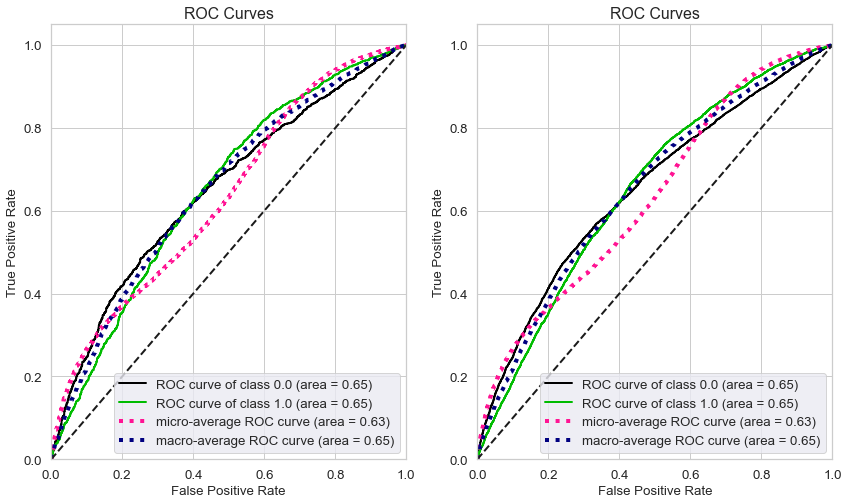


----------------------------------------------------------------
Obteniendo AUC de: Decision Tree


AUC_train: 0.77
AUC_val: 0.60




/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


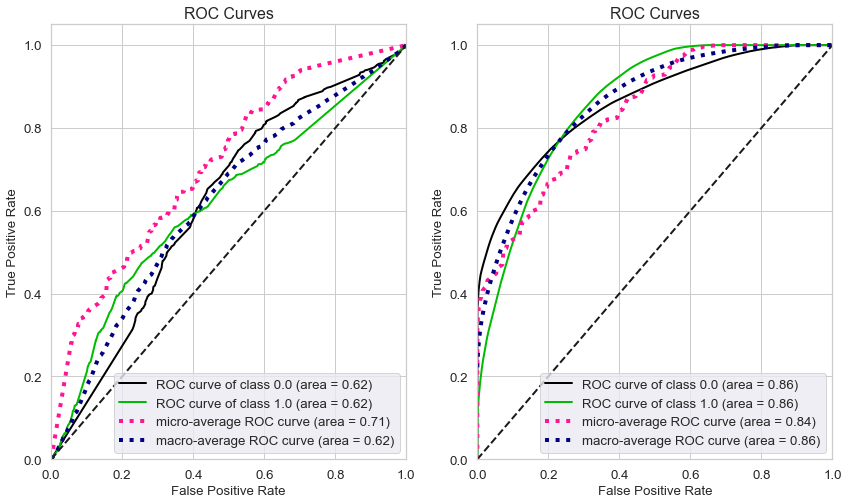


----------------------------------------------------------------
Obteniendo AUC de: Random Forest


AUC_train: 0.66
AUC_val: 0.64




/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


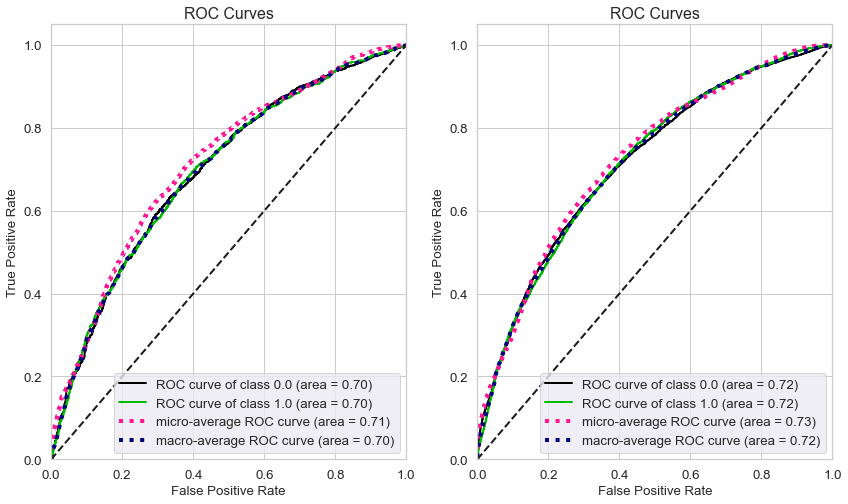


----------------------------------------------------------------
Obteniendo AUC de: Stochastic Gradient Descent


AUC_train: 0.60
AUC_val: 0.60




/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


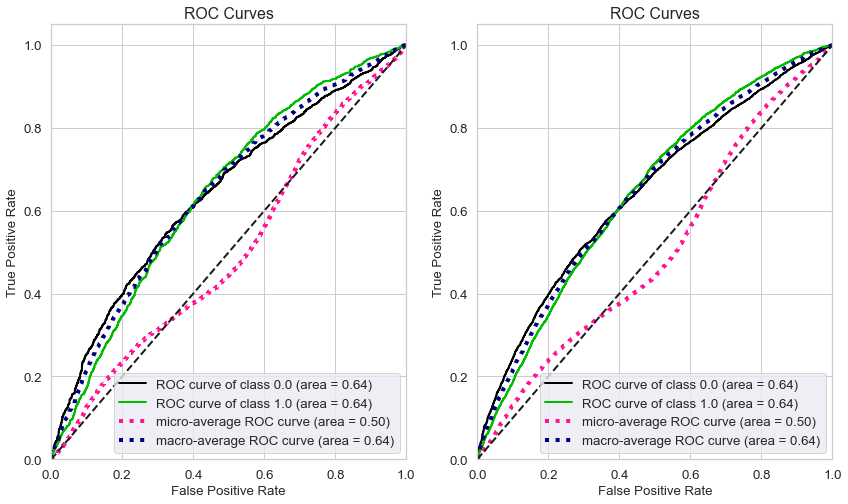


----------------------------------------------------------------
Obteniendo AUC de: Ada Boost


AUC_train: 0.52
AUC_val: 0.52




/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


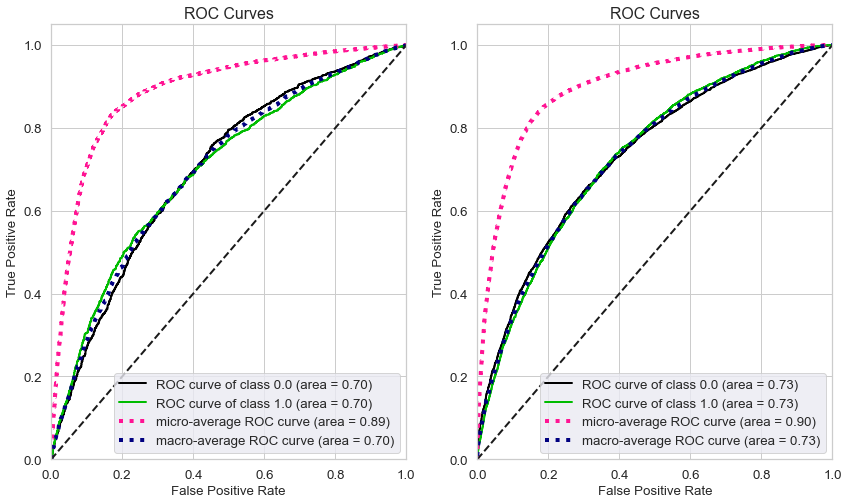


----------------------------------------------------------------
Obteniendo AUC de: XGBClassifier


AUC_train: 0.66
AUC_val: 0.53




/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


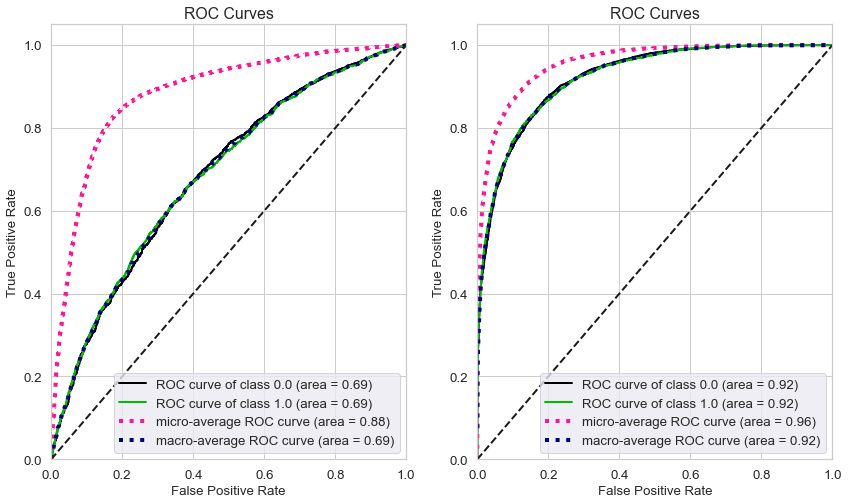

CPU times: user 9.58 s, sys: 403 ms, total: 9.98 s
Wall time: 5.65 s


In [17]:
%%time
# Calculamos AUC y las matrices de confusión
msc = list()
for k, v in clasificadores.items():
    print("\n----------------------------------------------------------------")
    print ('Obteniendo AUC de: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_val = v.predict(X_val)
    y_pred_train = v.predict(X_train)
    #======================================
    print('\n')
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    print(f"AUC_train: {roc_auc_train:.2f}")
    roc_auc_val = roc_auc_score(y_val, y_pred_val)
    print(f"AUC_val: {roc_auc_val:.2f}")
    print('\n')
    #======================================
    y_probas_train = v.predict_proba(X_train)
    preds_probtrain = y_probas_train [:,1]
    y_probas_val = v.predict_proba(X_val)
    preds_probval = y_probas_val [:,1]
    #======================================
    sns.set_style('whitegrid')
    sns.set_palette("Set2")
    #print("\n----------------------------------------------------------------")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[14, 8])
    sns.set(font_scale=1.1)
    skplt.metrics.plot_roc_curve(y_val, y_probas_val, ax=ax1)
    skplt.metrics.plot_roc_curve(y_train, y_probas_train, ax=ax2)
    plt.show()
    #======================================
    conf_matrixval = confusion_matrix(y_val, y_pred_val)
    conf_matrixtrain = confusion_matrix(y_train, y_pred_train)
    model['conf_matrixvalnorm'] = (conf_matrixval/(sum(conf_matrixval)))*100
    model['conf_matrixtrainnorm'] = (conf_matrixtrain/(sum(conf_matrixtrain)))*100

    msc.append(model)


####  <span style="color:#67bf5c"> Confussion Matrix Train Set <a name="id3"></a>

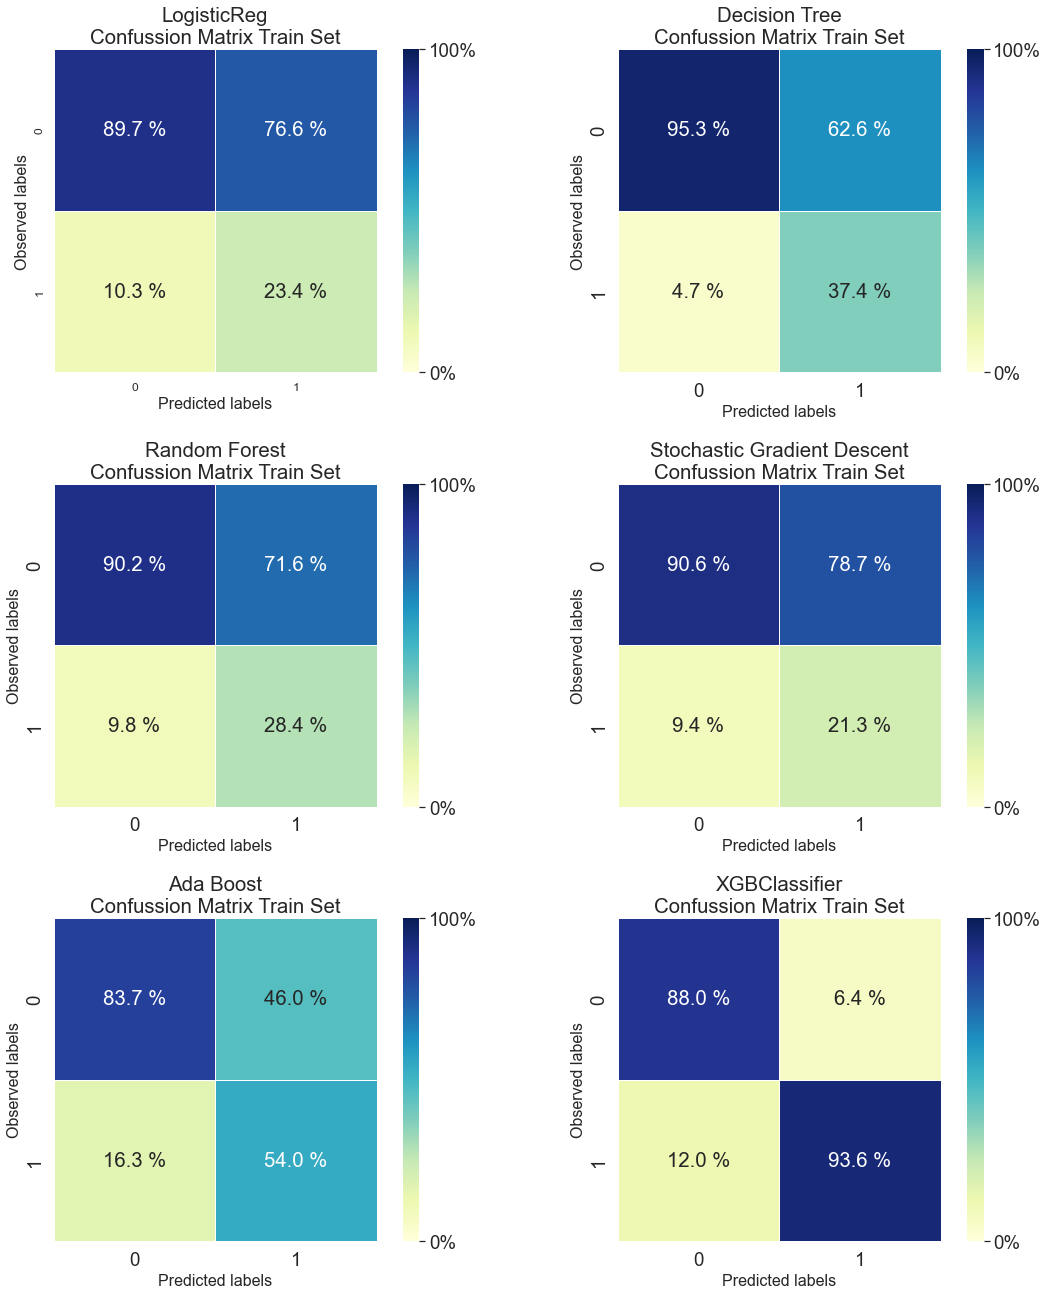

In [18]:
fig = plt.figure(figsize=(16, 60))
for i, mc in enumerate(msc):
    ax = plt.subplot(10, 2, i+1)
    sns.set(font_scale=1.7) 
    sns.heatmap(mc['conf_matrixtrainnorm'],annot=True, ax=ax, cmap="YlGnBu",cbar_kws={'format': '%.0f%%', 'ticks': [0, 100]},
            vmax=100, vmin=0, fmt = '.1f', square=4, linewidth=1.)
    for t in ax.texts: t.set_text(t.get_text() + " %")
    label_font = {'size':'16'}
    ax.set_xlabel('Predicted labels', fontdict=label_font);
    ax.set_ylabel('Observed labels', fontdict=label_font);
    title_font = {'size':'15'}
    ax.set_title('{}\nConfussion Matrix Train Set'.format(mc['name']));
    
fig.tight_layout()
plt.show()

####  <span style="color:#67bf5c"> Confussion Matrix Val Set <a name="id3"></a>

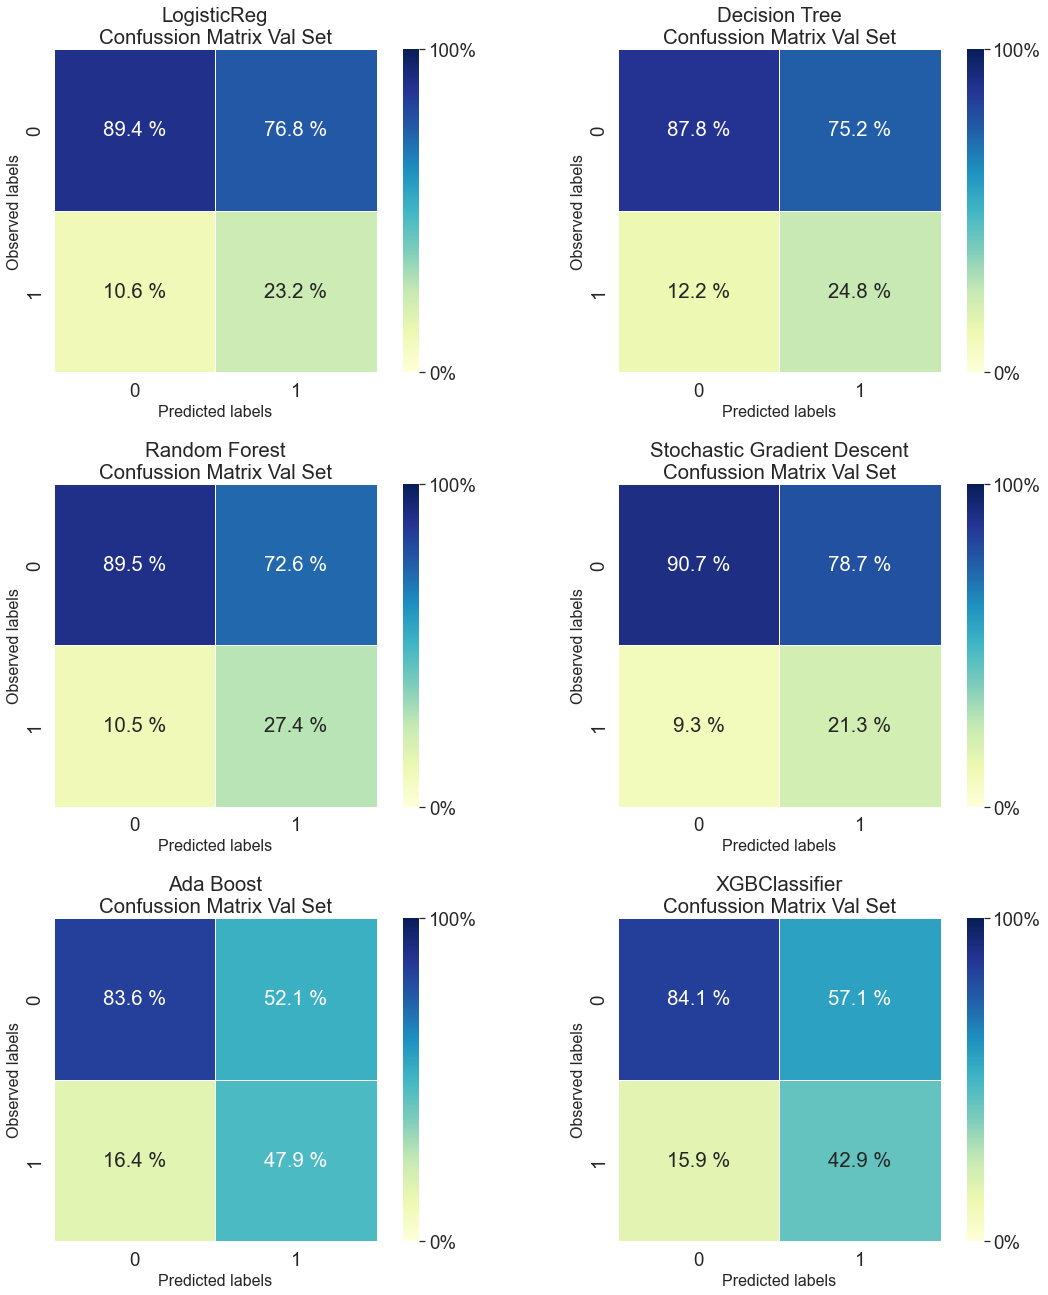

In [19]:
fig = plt.figure(figsize=(16, 60))
for i, mc in enumerate(msc):
    ax = plt.subplot(10, 2, i+1)
    sns.set(font_scale=1.7) 
    sns.heatmap(mc['conf_matrixvalnorm'],annot=True, ax=ax, cmap="YlGnBu",cbar_kws={'format': '%.0f%%', 'ticks': [0, 100]},
            vmax=100, vmin=0, fmt = '.1f', square=4, linewidth=1.)
    for t in ax.texts: t.set_text(t.get_text() + " %")
    label_font = {'size':'16'}
    ax.set_xlabel('Predicted labels', fontdict=label_font);
    ax.set_ylabel('Observed labels', fontdict=label_font);
    title_font = {'size':'15'}
    ax.set_title('{}\nConfussion Matrix Val Set'.format(mc['name']));
    
fig.tight_layout()
plt.show()

In [20]:
feature_names = ['c0044', 'd0031', 'b0007', 'c0031', 'a8404', 'c0019',
       'd0027', 'c9008', 'd2112', 'd0012', 'month', 'c0039_K6419',
       'c0039_K6499', 'c0039_K6512', 'c0039_K6619', 'c0039_K6622',
       'c0039_K_others']

####  <span style="color:#67bf5c"> Feature Importance <a name="id3"></a>


----------------------------------------------------------------
Getting Variable_Importance from: Decision Tree


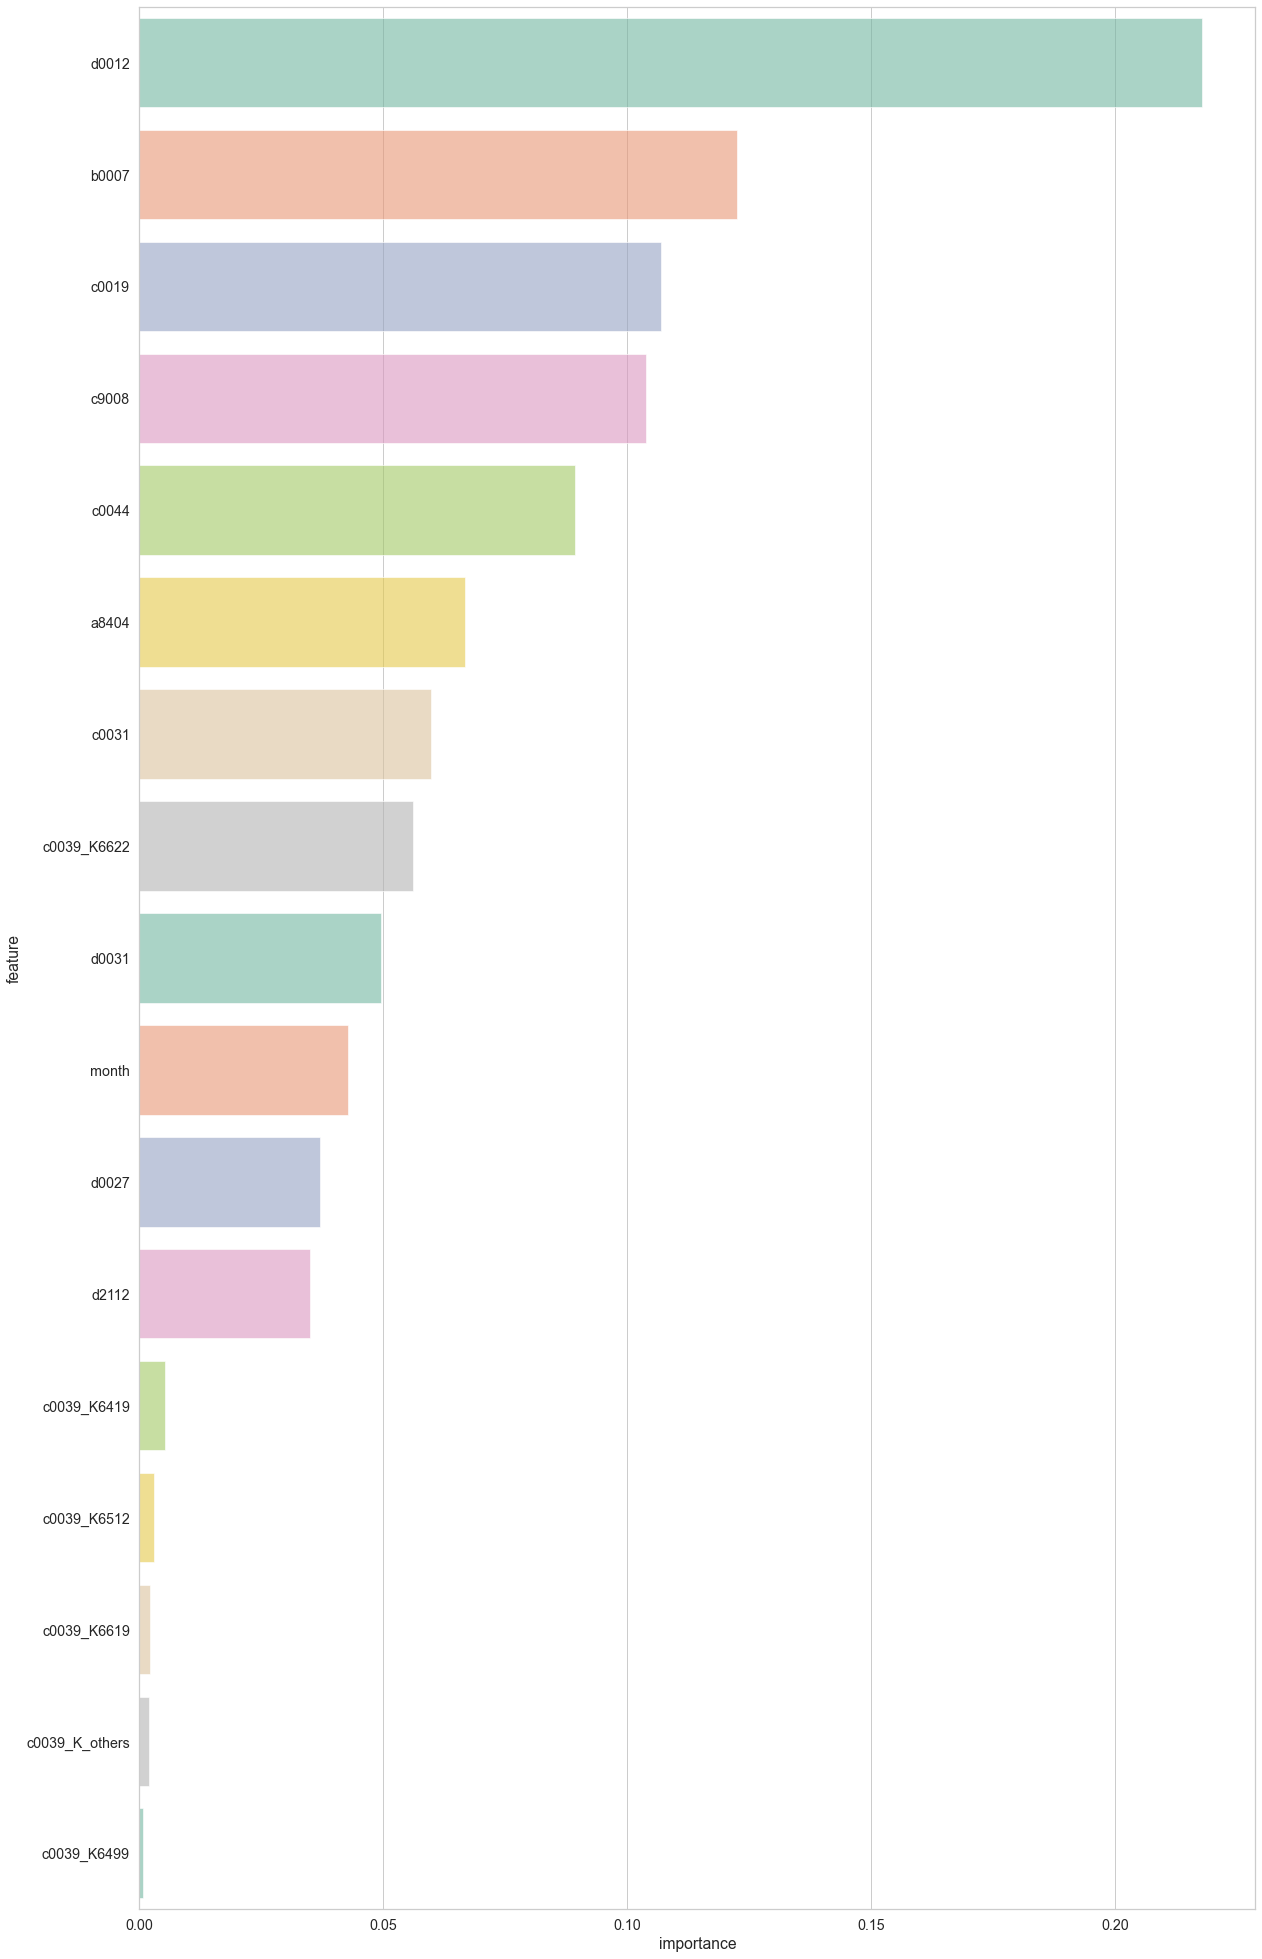


----------------------------------------------------------------
Getting Variable_Importance from: Random Forest


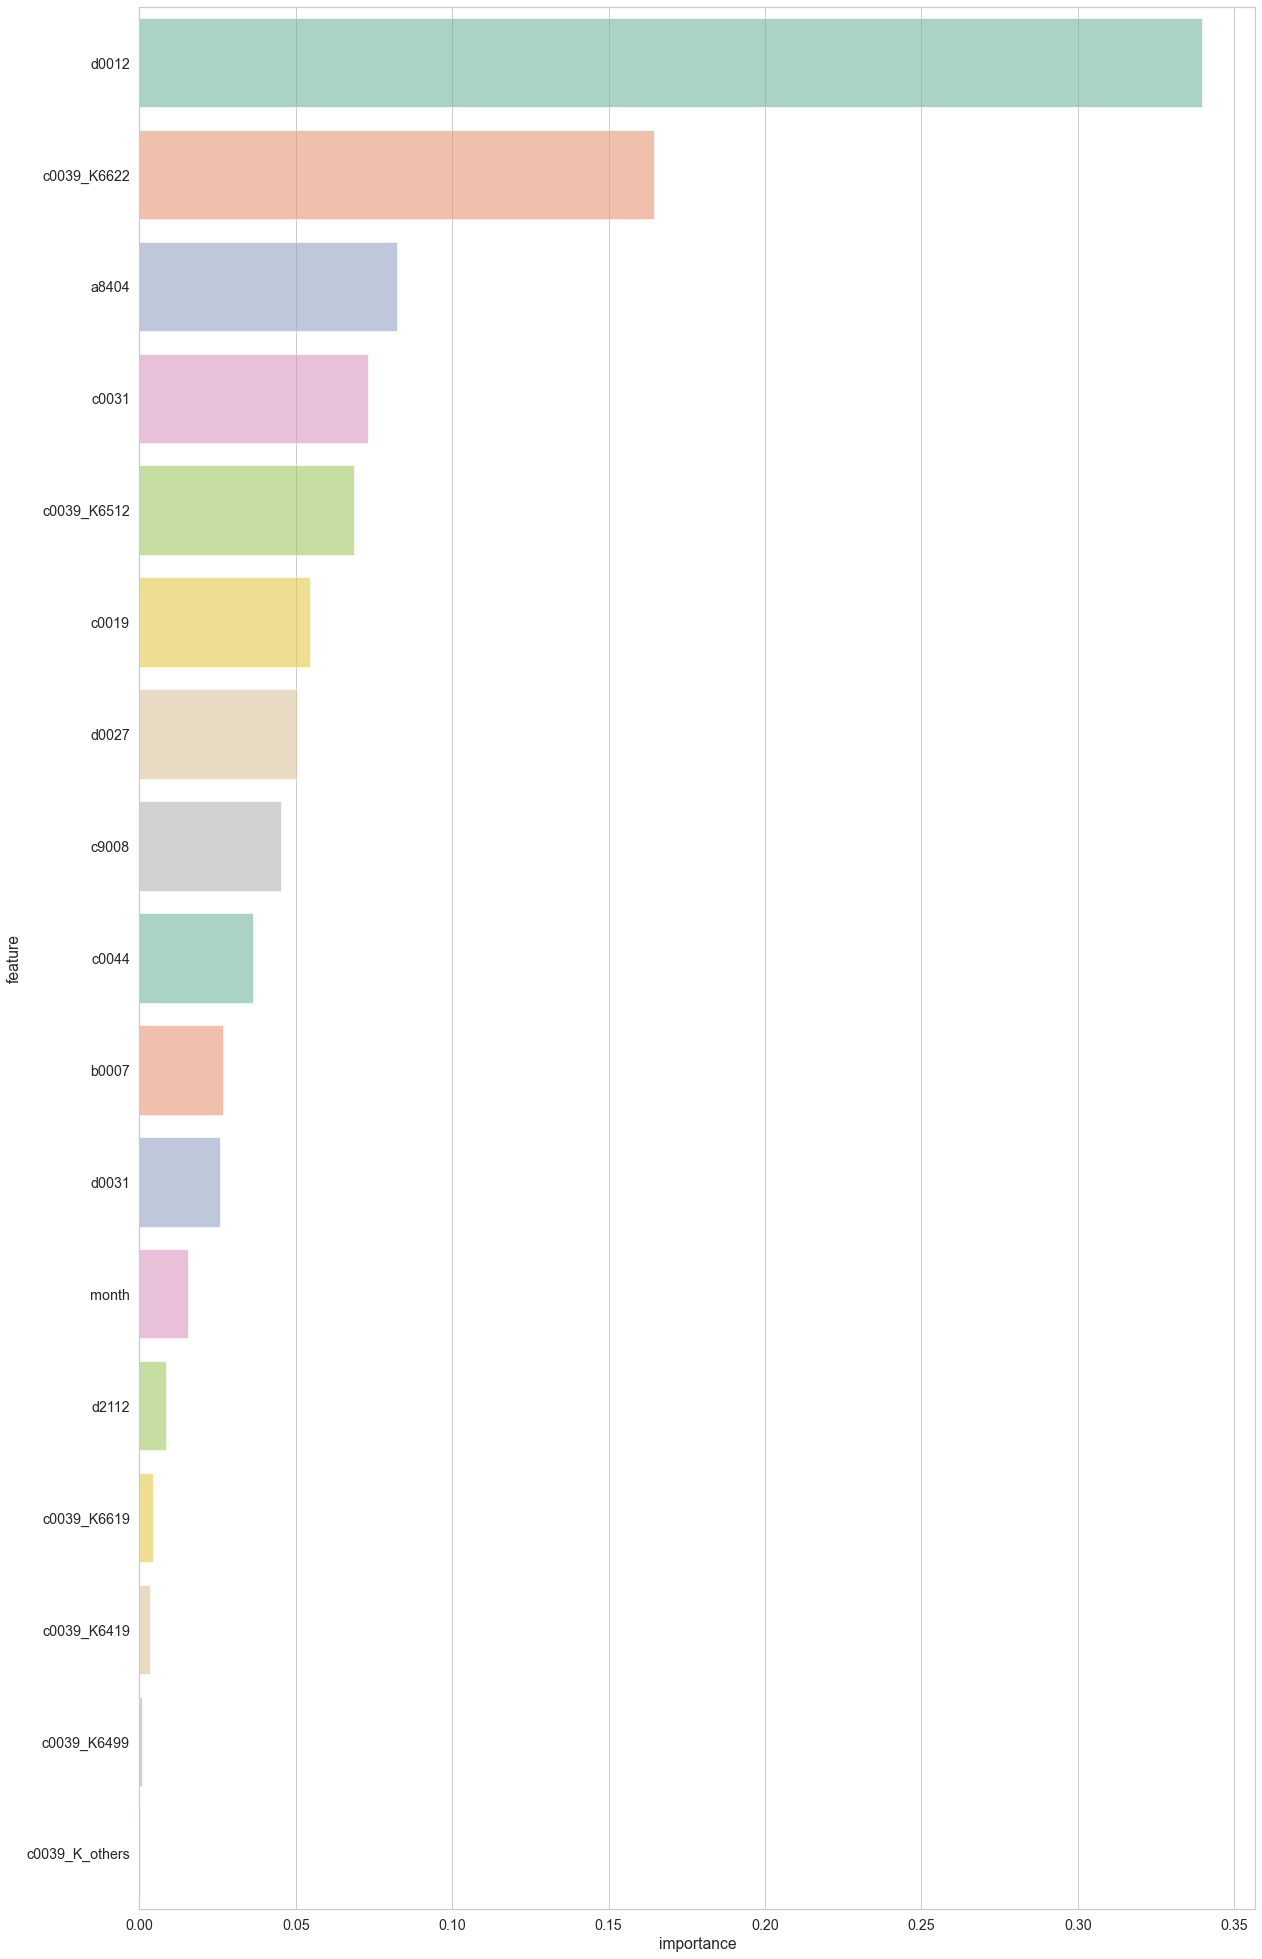


----------------------------------------------------------------
Getting Variable_Importance from: Ada Boost


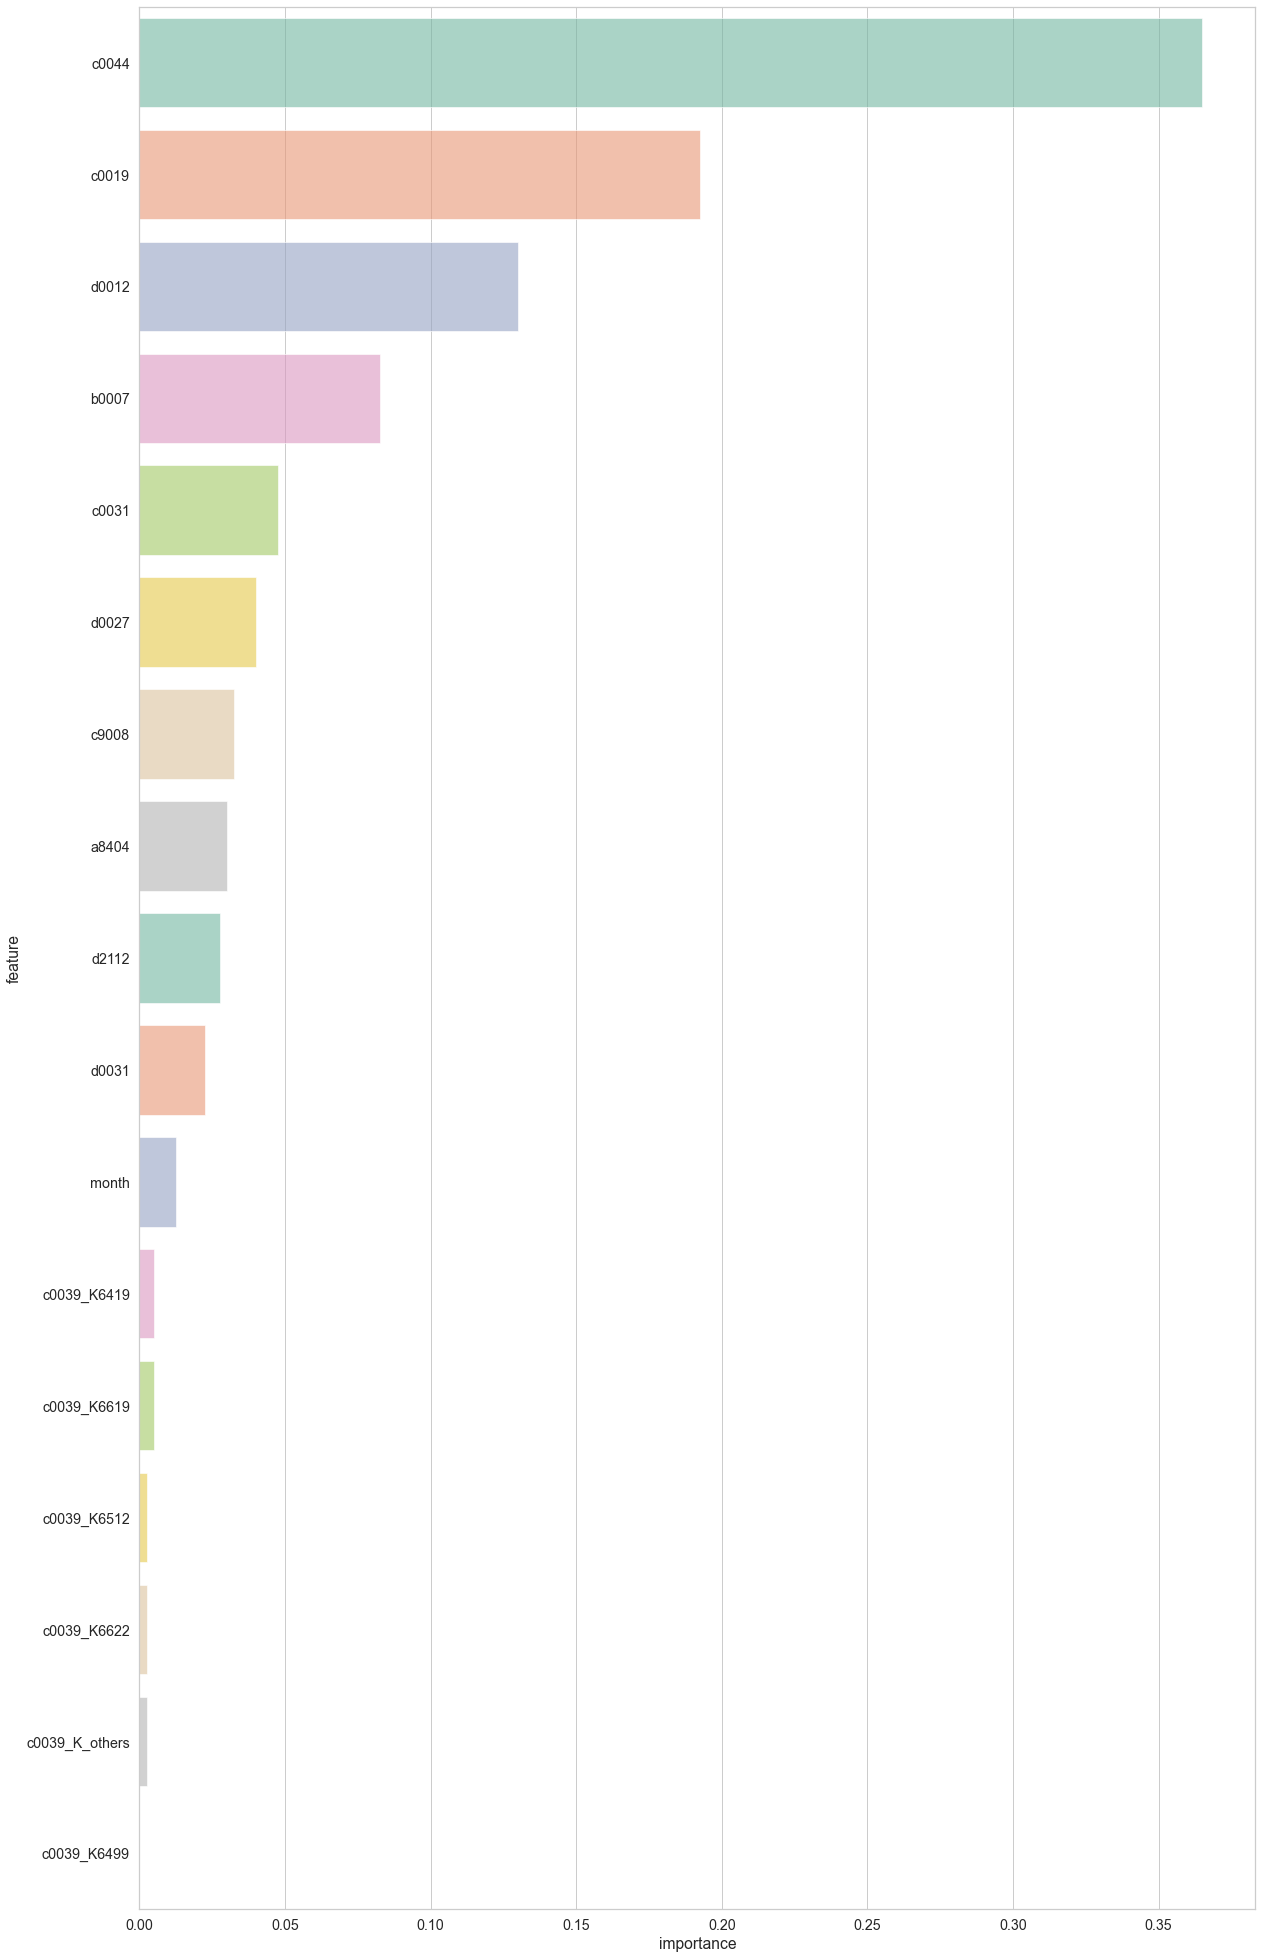


----------------------------------------------------------------
Getting Variable_Importance from: XGBClassifier


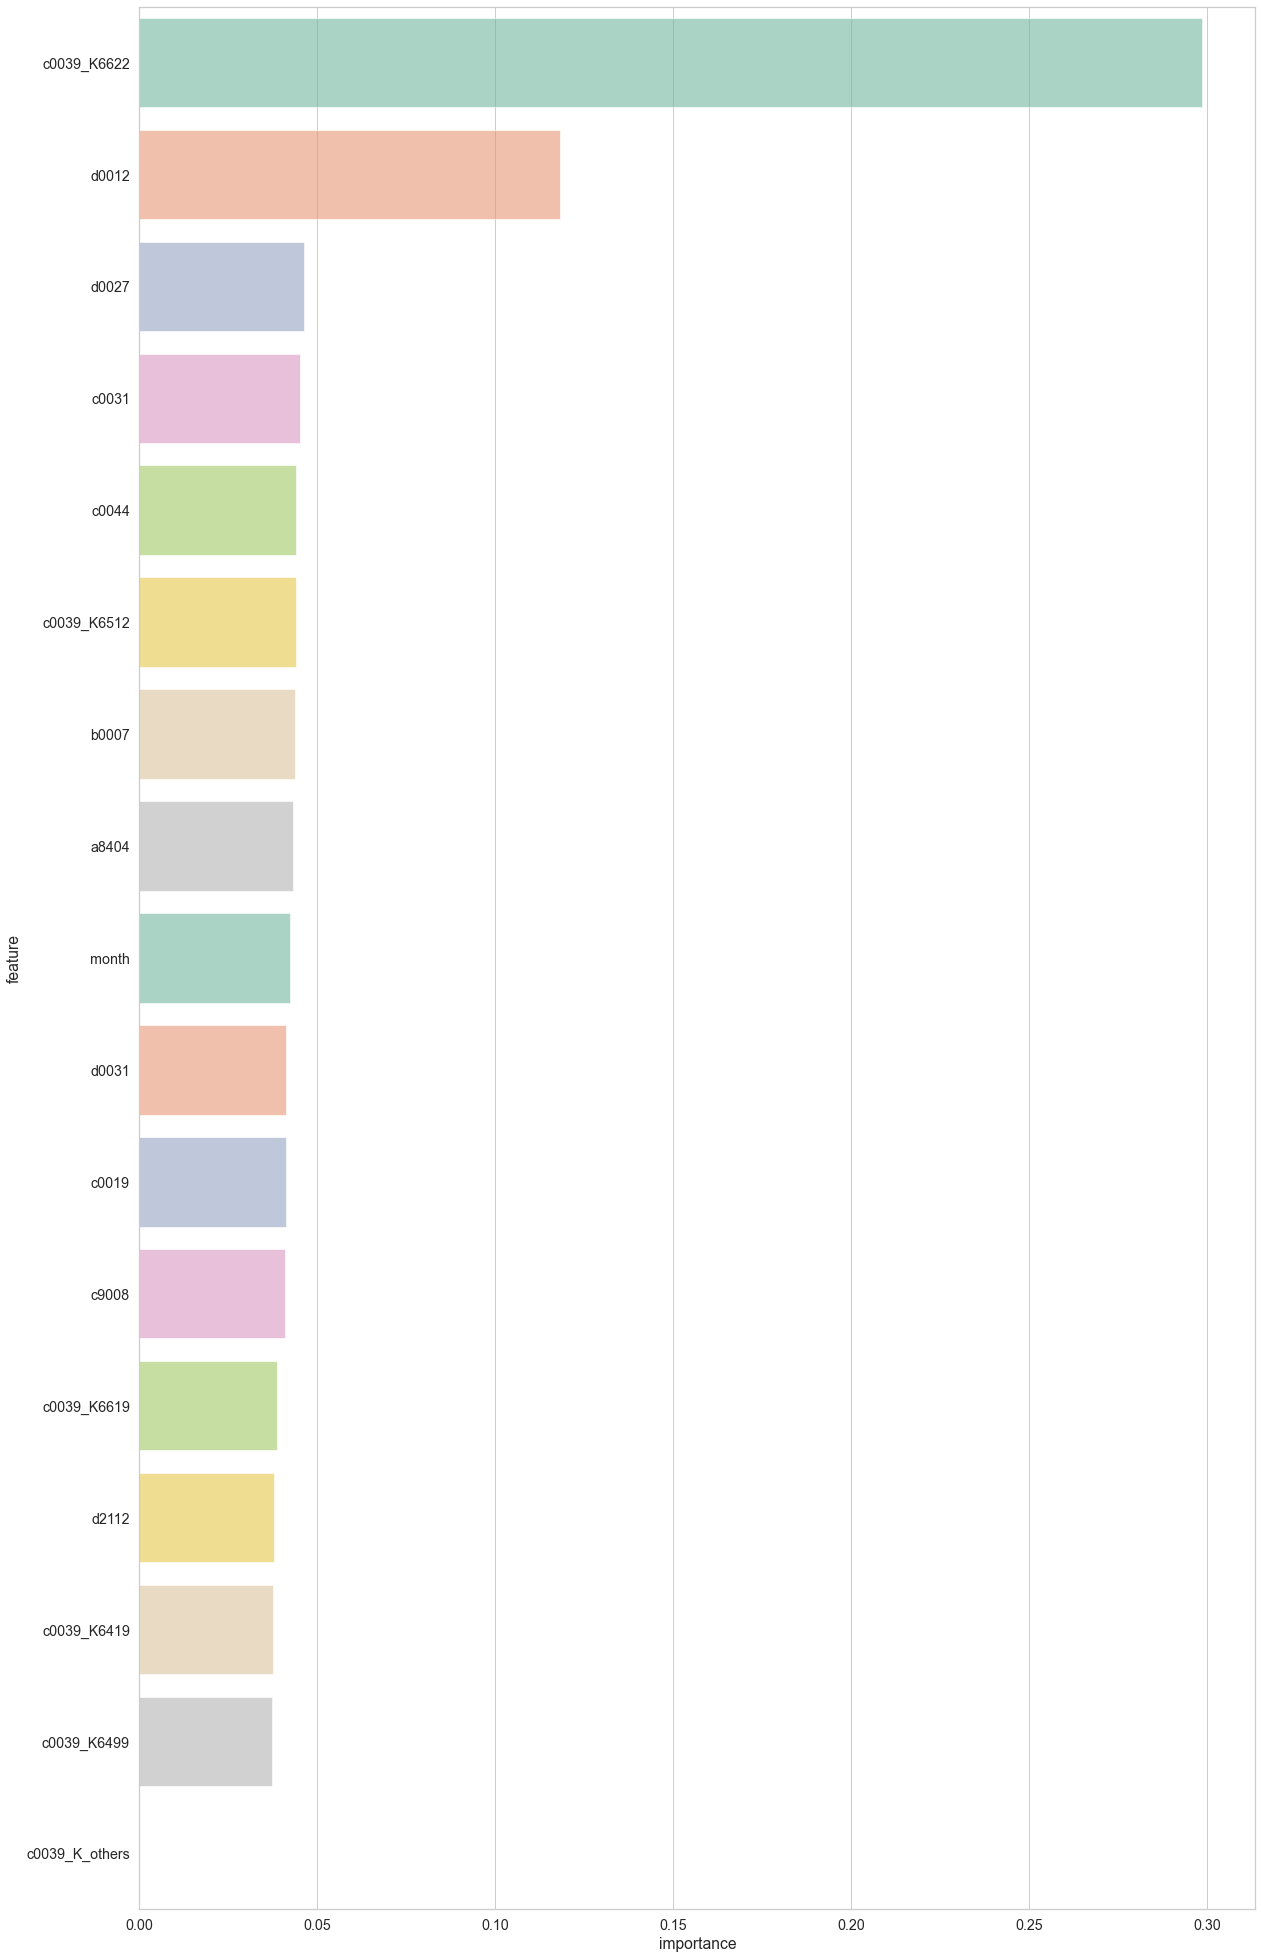

CPU times: user 1.55 s, sys: 53.7 ms, total: 1.61 s
Wall time: 1.6 s


In [21]:
%%time

def plot_importance(model):
    importance = pandas.DataFrame({
        "feature": feature_names,
        "importance": model.feature_importances_
    }).sort_values("importance", ascending = False)

    fig = plt.figure(figsize=(20, 35))
    sns.set(font_scale=1.3)
    sns.set_style('whitegrid')
    sns.barplot(y = "feature", x = "importance", data = importance, alpha = 0.6, palette = "Set2")
    plt.show()
    
for k, v in clasificadores.items():

    model = {}
    model['name'] = k
    if k == 'LogisticReg' or k == 'Stochastic Gradient Descent':
        continue
    
    print("\n----------------------------------------------------------------")
    print ('Getting Variable_Importance from: {model}'.format(model=k))
    plot_importance(v)

> Observation:
>
>The first approach is decided to build models selected with the input as it is. The models were created with simple parameters. The best model performance following the AUC, are the Random Forest, Logistic Regression and Decision Tree. However, if I look to the F1 score and the confussion matrix, the XGBClassifier gives descent number in comparison with the other models. Therefore, the models mentioned will pass to the next approach. 